###Analisi dei disastri aerei dal 1919 al 2023

La neonata IASS (International Alliance for Safe Skies) ti ha incaricato di svolgere un'accurata analisi di tutti gli incidenti aerei che si sono verificati dal 1919 al 2023.

A tale scopo ti mette a disposizione un set di dati in cui sono registrati quasi 25.000  incidenti con le seguenti informazioni

- date: data dell'incidente
- type: tipo del velivolo
- registration: codice di registrazione del velivolo
- operator: operatore del velivolo
- fatalities: numero di morti
- location: luogo dell'incidente
- country: nazione dell'incidente
- cat: categoria dell'incidente come descritto dal ASN


Utilizza i dati per portare alla luce, anche tramite grafici e visualizzazioni, utili insight.

##ESEMPI DI INSIGHT
Questi sono esempi di domande alla quale puoi trovare risposta tramite i dati, non limitarti a queste ma svolgi un’analisi approfondita ponendoti ulteriori domande che pensi possano fornire insight utili
- In quale nazione si sono verificati più incidenti?
- Gli incidenti avvengono più di frequente durante determinati giorni della settimana?
- Quali sono gli operatori più sicuri?
- Quale tipo di velivolo ha causato più morti?
- Come si sono evoluti gli incidenti dopo l'11 Settembre?

##BONUS
Crea un cartogramma che rappresenti il numero di incidenti per nazione


In [ ]:
!pip install matplotlib

In [ ]:
from matplotlib import pyplot as pyplot

import pandas as pd

In [ ]:
import csv

data = pd.read_csv('aviation-accidents.csv')

data


,date,type,registration,operator,fatalities,location,country,cat,year
0,date unk.,Antonov An-12B,T-1206,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
1,date unk.,Antonov An-12B,T-1204,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
2,date unk.,Antonov An-12B,T-1201,Indonesian AF,NaN,NaN,Unknown country,U1,unknown
3,date unk.,Antonov An-12BK,NaN,Soviet AF,NaN,Tiksi Airport (IKS),Russia,A1,unknown
4,date unk.,Antonov An-12BP,CCCP-11815,Soviet AF,0,Massawa Airport ...,Eritrea,A1,unknown
...,...,...,...,...,...,...,...,...,...
35468,11-MAY-2023,Hawker 900XP,PK-LRU,Angkasa Super Services,0,Maleo Airport (MOH),Indonesia,A2,2023
35469,11-MAY-2023,Cessna 208B Grand Caravan,PK-NGA,Nasional Global Aviasi,0,Fentheik Airstrip,Indonesia,A2,2023
35470,12-MAY-2023,Cessna 208B Grand Caravan,5X-RBR,Bar Aviation,0,Kampala-Kajjansi...,Uganda,A1,2023
35471,14-MAY-2023,Boeing 747-4R7F,LX-OCV,Cargolux,0,Luxembourg-Finde...,Luxembourg,A2,2023


In [ ]:
# Trasformo la colonna Date in formato data

data['date'] = pd.to_datetime(data['date'], format='%d-%b-%Y', errors='coerce')

# Trasformo la colonna Fatalities in formato numerico

data['fatalities'] = pd.to_numeric(data['fatalities'], errors='coerce')


In [ ]:
#controllo se ci sono dati errati

data.isnull().sum()

date             828
type               0
registration    2258
operator           8
fatalities      5031
location        1178
country            1
cat                1
year               1
dtype: int64

In [ ]:
# elimino le colonne registration e location che hanno molti errori e non ci servono

data_cleaned = data.drop(['registration', 'location'], axis=1)

data_cleaned

,date,type,operator,fatalities,country,cat,year
0,NaT,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,unknown
1,NaT,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,unknown
2,NaT,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,unknown
3,NaT,Antonov An-12BK,Soviet AF,NaN,Russia,A1,unknown
4,NaT,Antonov An-12BP,Soviet AF,0.0,Eritrea,A1,unknown
...,...,...,...,...,...,...,...
35468,2023-05-11,Hawker 900XP,Angkasa Super Services,0.0,Indonesia,A2,2023
35469,2023-05-11,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Indonesia,A2,2023
35470,2023-05-12,Cessna 208B Grand Caravan,Bar Aviation,0.0,Uganda,A1,2023
35471,2023-05-14,Boeing 747-4R7F,Cargolux,0.0,Luxembourg,A2,2023


In [ ]:
#elimino le righe con operator errato

data_cleaned = data_cleaned.dropna(subset=['operator'])

data_cleaned

,date,type,operator,fatalities,country,cat,year
0,NaT,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,unknown
1,NaT,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,unknown
2,NaT,Antonov An-12B,Indonesian AF,NaN,Unknown country,U1,unknown
3,NaT,Antonov An-12BK,Soviet AF,NaN,Russia,A1,unknown
4,NaT,Antonov An-12BP,Soviet AF,0.0,Eritrea,A1,unknown
...,...,...,...,...,...,...,...
35468,2023-05-11,Hawker 900XP,Angkasa Super Services,0.0,Indonesia,A2,2023
35469,2023-05-11,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Indonesia,A2,2023
35470,2023-05-12,Cessna 208B Grand Caravan,Bar Aviation,0.0,Uganda,A1,2023
35471,2023-05-14,Boeing 747-4R7F,Cargolux,0.0,Luxembourg,A2,2023


In [ ]:
#elimino le righe con date assente

data_cleaned = data_cleaned.dropna(subset=['date'])

data_cleaned

,date,type,operator,fatalities,country,cat,year
61,1919-08-02,Caproni Ca.48,Caproni,14.0,Italy,A1,1919
62,1919-08-11,Felixstowe Fury,RAF,1.0,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,Handley Page Transport,0.0,South Africa,A1,1920
64,1920-02-25,Handley Page O/400,Handley Page Transport,0.0,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,Handley Page Transport,0.0,Sweden,A1,1920
...,...,...,...,...,...,...,...
35468,2023-05-11,Hawker 900XP,Angkasa Super Services,0.0,Indonesia,A2,2023
35469,2023-05-11,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Indonesia,A2,2023
35470,2023-05-12,Cessna 208B Grand Caravan,Bar Aviation,0.0,Uganda,A1,2023
35471,2023-05-14,Boeing 747-4R7F,Cargolux,0.0,Luxembourg,A2,2023


In [ ]:
#sostituisco i dati mancanti nella colonna Fatalities con la media calcolata

fatalities_mean = data_cleaned['fatalities'].mean()
data_cleaned.loc[:, 'fatalities'] = data_cleaned['fatalities'].fillna(fatalities_mean)


data_cleaned

,date,type,operator,fatalities,country,cat,year
61,1919-08-02,Caproni Ca.48,Caproni,14.0,Italy,A1,1919
62,1919-08-11,Felixstowe Fury,RAF,1.0,U.K.,A1,1919
63,1920-02-23,Handley Page O/7,Handley Page Transport,0.0,South Africa,A1,1920
64,1920-02-25,Handley Page O/400,Handley Page Transport,0.0,Sudan,A1,1920
65,1920-06-30,Handley Page O/400,Handley Page Transport,0.0,Sweden,A1,1920
...,...,...,...,...,...,...,...
35468,2023-05-11,Hawker 900XP,Angkasa Super Services,0.0,Indonesia,A2,2023
35469,2023-05-11,Cessna 208B Grand Caravan,Nasional Global Aviasi,0.0,Indonesia,A2,2023
35470,2023-05-12,Cessna 208B Grand Caravan,Bar Aviation,0.0,Uganda,A1,2023
35471,2023-05-14,Boeing 747-4R7F,Cargolux,0.0,Luxembourg,A2,2023


In [ ]:
#controllo che i dati non abbiano errori

data_cleaned.isnull().sum()

date          0
type          0
operator      0
fatalities    0
country       0
cat           0
year          0
dtype: int64

In [ ]:
#conto i valori per trovare i 10 Paesi con più incidenti

incident_counts = data_cleaned['country'].value_counts()

print(incident_counts.head(10))

country
USA                6691
Russia             2146
Canada             1351
U.K.               1055
Brazil              909
India               880
Unknown country     787
Colombia            739
Indonesia           724
France              717
Name: count, dtype: int64


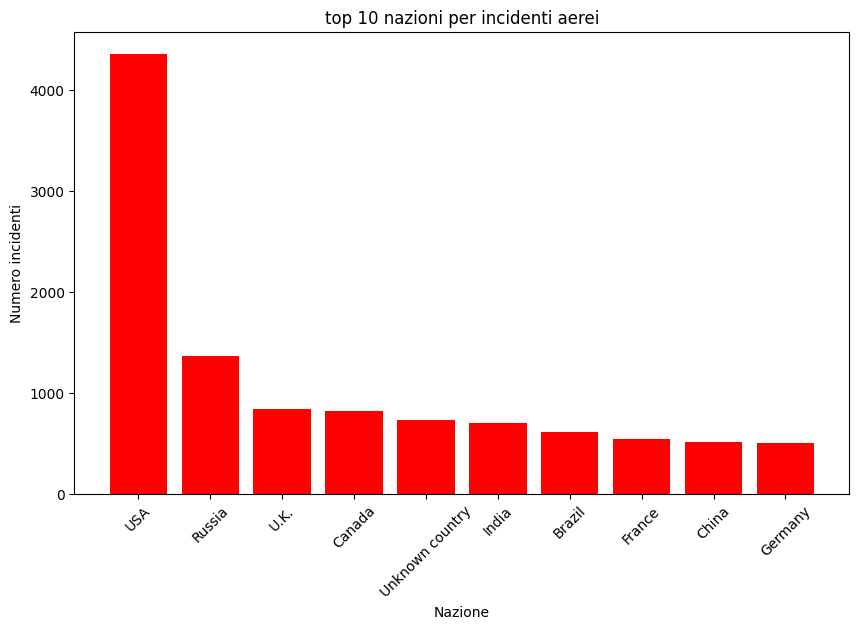

In [ ]:
#In quale nazione si sono verificati più incidenti?

import matplotlib.pyplot as plt

incident_counts = data_cleaned['country'].value_counts().head(10)

plt.figure(figsize=(10,6))

plt.bar(incident_counts.index, incident_counts.values, color= "red")

plt.title("top 10 nazioni per incidenti aerei")
plt.xlabel("Nazione")
plt.ylabel("Numero incidenti")
plt.xticks(rotation=45)
plt.show()

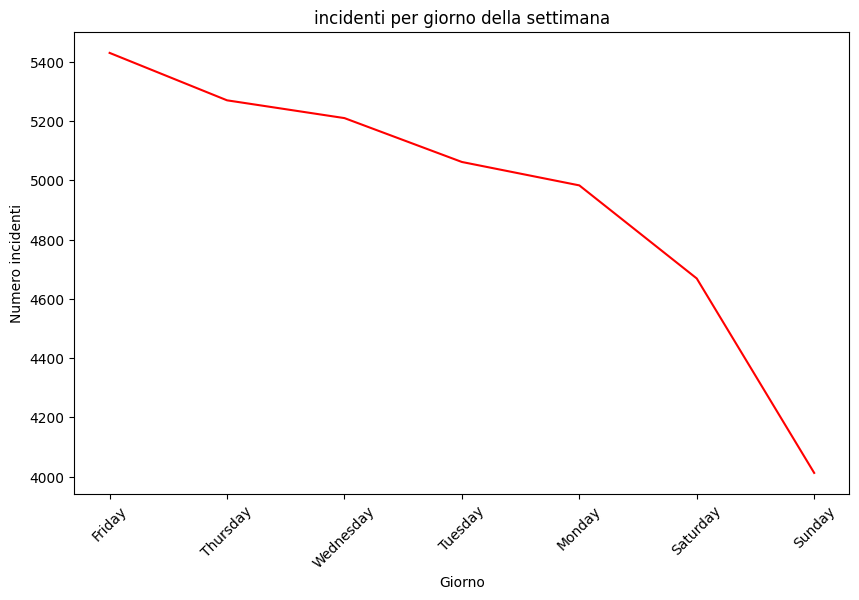

In [ ]:
#Gli incidenti avvengono più di frequente durante determinati giorni della settimana?

data_cleaned.loc[:, 'day_of_week'] = data_cleaned['date'].dt.day_name()

incident_frequency = data_cleaned['day_of_week'].value_counts()

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(incident_frequency.index, incident_frequency.values, color= "red")
plt.title("incidenti per giorno della settimana")
plt.xlabel("Giorno")
plt.ylabel("Numero incidenti")
plt.xticks(rotation=45)
plt.show()

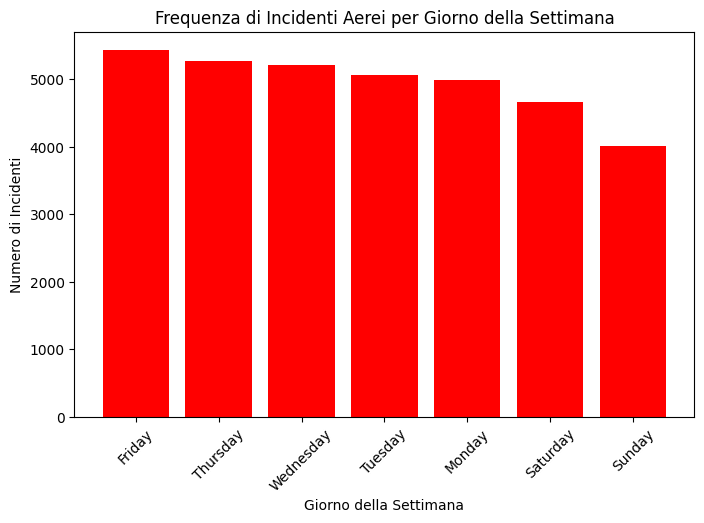

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(incident_frequency.index, incident_frequency.values, color='red')
plt.title('Frequenza di Incidenti Aerei per Giorno della Settimana')
plt.xlabel('Giorno della Settimana')
plt.ylabel('Numero di Incidenti')
plt.xticks(rotation=45)
plt.show()

In [ ]:
operator_counts = data_cleaned['operator'].value_counts()

print(operator_counts.tail(10))

operator
TEAL                           1
Miami Aviation                 1
Fruehauf                       1
Morton Air Services            1
Jack Adams Aircraft Sales      1
Krasnokutske Flight School     1
Burroughs Corp.                1
John W. Mecom Oil Co.          1
Zantop, lsf Aaxico Airlines    1
Pan Alaska Airways             1
Name: count, dtype: int64


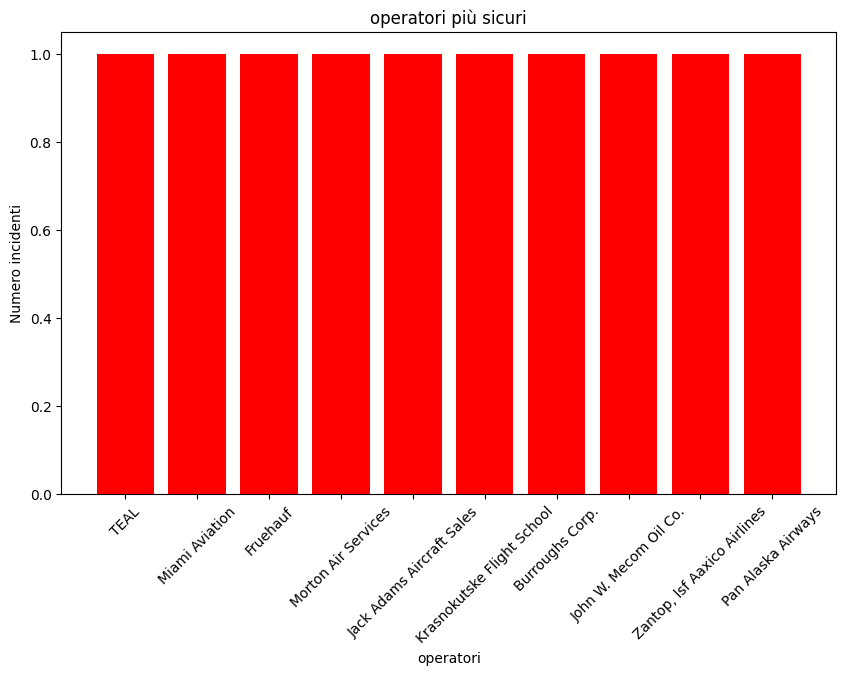

In [ ]:
#Quali sono gli operatori più sicuri?

operator_counts = data_cleaned['operator'].value_counts().tail(10)

plt.figure(figsize=(10,6))

plt.bar(operator_counts.index, operator_counts.values, color= "red")

plt.title("operatori più sicuri")
plt.xlabel("operatori")
plt.ylabel("Numero incidenti")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Quale tipo di velivolo ha causato più morti?

fatalities_for_type = data_cleaned.groupby('type')['fatalities'].sum()

fatalities_for_type = fatalities_for_type.sort_values(ascending=False)

print(fatalities_for_type.head(15))

type
Douglas C-47A (DC-3)        11125.766071
Douglas C-47 (DC-3)          4697.954638
Douglas C-47B (DC-3)         3529.973494
Curtiss C-46A                2856.721241
Tupolev Tu-154M              2814.220825
Antonov An-26                2519.766603
Lockheed C-130H Hercules     2468.772889
Junkers Ju-52/3m             2369.482923
DC-9-32                      2204.165619
Curtiss C-46D                2107.041272
DHC-6 Twin Otter 300         2104.441651
Ilyushin Il-18V              1728.110413
Antonov An-24RV              1718.441651
Tupolev Tu-134A              1672.110413
Yakovlev Yak-40              1603.441651
Name: fatalities, dtype: float64


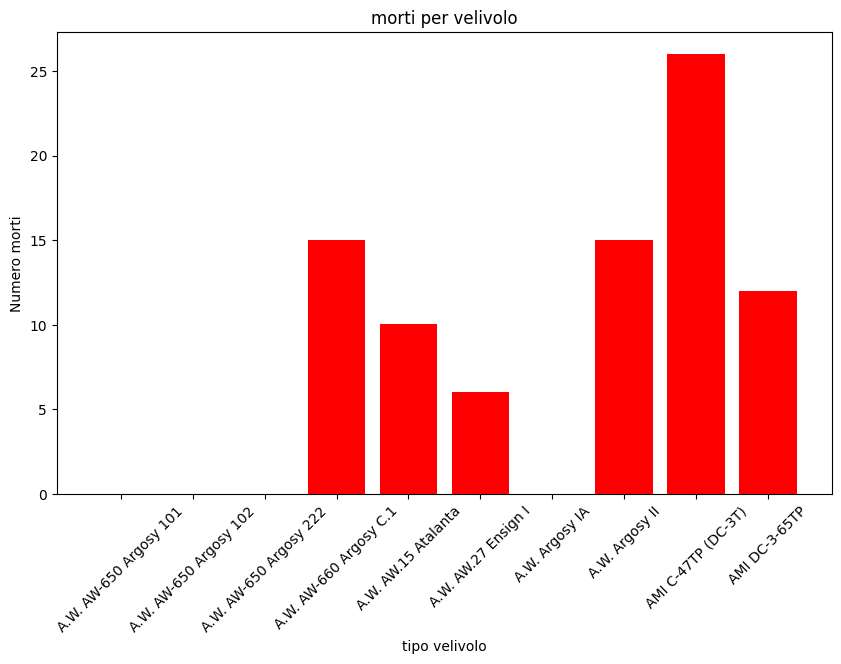

In [ ]:
fatalities_for_type = data_cleaned.groupby('type')['fatalities'].sum().head(10)

plt.figure(figsize=(10,6))

plt.bar(fatalities_for_type.index, fatalities_for_type.values, color= "red")

plt.title("morti per velivolo")
plt.xlabel("tipo velivolo")
plt.ylabel("Numero morti")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Come si sono evoluti gli incidenti dopo l'11 Settembre?

#creo di due sottoinsiemi di dati:

pre_911 = data_cleaned[data_cleaned['date'] < '11-sep-2001']
post_911 = data_cleaned[data_cleaned['date'] >= '11-sep-2001']


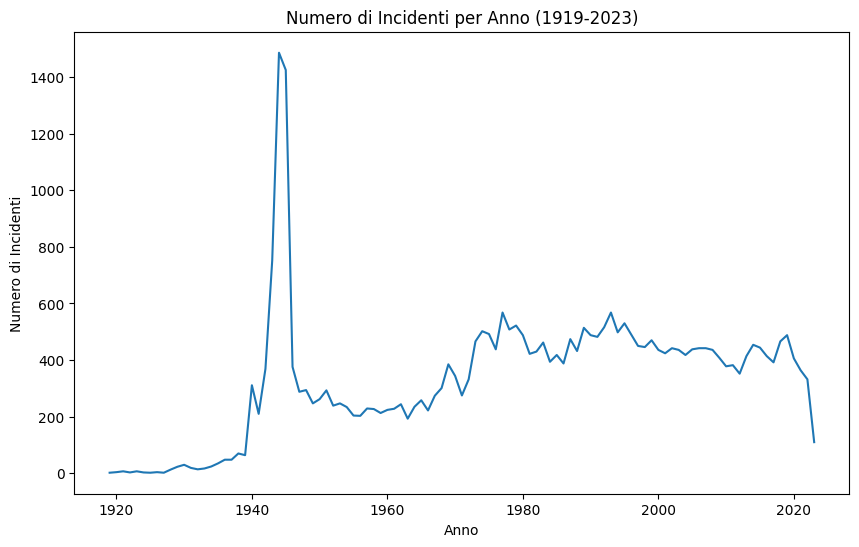

In [ ]:
data_cleaned.groupby(data_cleaned['date'].dt.year)['date'].count().plot(kind='line', figsize=(10,6))
plt.title('Numero di Incidenti per Anno (1919-2023)')
plt.xlabel('Anno')
plt.ylabel('Numero di Incidenti')
plt.show()

In [ ]:
avg_incidents_pre = pre_911.groupby(pre_911['date'].dt.year).size().mean()
avg_incidents_post = post_911.groupby(post_911['date'].dt.year).size().mean()

print(f"Media Incidenti Annui Pre-11/9: {avg_incidents_pre}")
print(f"Media Incidenti Annui Post-11/9: {avg_incidents_post}")

Media Incidenti Annui Pre-11/9: 308.73493975903614
Media Incidenti Annui Post-11/9: 391.82608695652175


In [ ]:
#quanti incidenti e quanti morti ci sono stati in Italia?
data_italia = data_cleaned[data_cleaned['country'] == 'Italy']

accidents_italy = len(data_italia)

fatalities_italy = data_italia['fatalities'].sum()

print(f"Numero di incidenti aerei in Italia: {accidents_italy}")
print(f"Numero totale di morti: {fatalities_italy}")

Numero di incidenti aerei in Italia: 459
Numero totale di morti: 2894.416508696664
